# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your name below

In [2]:
print("Rohan Patel")

Rohan Patel


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [2]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt



<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/investment.csv"
- Write a lambda function for $V = P/(1+r)$.
- Use ```list(map(...))``` to calculate $V$ for each row of the dataset


In [11]:
# Write your own code here
dataset = pd.read_csv("data/investment.csv")

fn_inv = lambda P,r: P / (1+r)

dataset["V"] = list(map(fn_inv, dataset["P"],dataset["r"]))

dataset


,P,r,V
0,1000,0.01,990.099010
1,2000,0.02,1960.784314
2,500,0.03,485.436893
3,800,0.04,769.230769
4,400,0.08,370.370370


<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

In [16]:
# Write your own code here
wdi_2020 = pd.read_csv("data/wdi_2020.csv")
fn_upper = lambda x: x.upper()

wdi_2020["countryname_upper"] = wdi_2020["countryname"].apply(fn_upper)






<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" 

<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in descending order
- Subset the 5 countries with the highest urban population

In [29]:
# Write your code here

wdi_2020sorted = wdi_2020.sort_values(by = "prop_urbanpopulation", ascending = False)

display(wdi_2020sorted.iloc[[0,1,2,3,4],:])


,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
212,2020,YR2020,Singapore,SGP,100.0,SINGAPORE
147,2020,YR2020,"Macao SAR, China",MAC,100.0,"MACAO SAR, CHINA"
40,2020,YR2020,Cayman Islands,CYM,100.0,CAYMAN ISLANDS
90,2020,YR2020,Gibraltar,GIB,100.0,GIBRALTAR
103,2020,YR2020,"Hong Kong SAR, China",HKG,100.0,"HONG KONG SAR, CHINA"


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the median of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" above the median

In [59]:
# Write your own code here
wdi_small = wdi_2020sorted.iloc[[132,133]]

median = (wdi_small.iloc[0,4] + wdi_small.iloc[1,4])/2

above_median = wdi_2020.query("prop_urbanpopulation > @median")

above_median


,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
3,2020,YR2020,Albania,ALB,62.112000,ALBANIA
4,2020,YR2020,Algeria,DZA,73.733000,ALGERIA
5,2020,YR2020,American Samoa,ASM,87.153000,AMERICAN SAMOA
6,2020,YR2020,Andorra,AND,87.916000,ANDORRA
7,2020,YR2020,Angola,AGO,66.825000,ANGOLA
...,...,...,...,...,...,...
254,2020,YR2020,Upper middle income,UMC,67.601442,UPPER MIDDLE INCOME
255,2020,YR2020,Uruguay,URY,95.515000,URUGUAY
258,2020,YR2020,"Venezuela, RB",VEN,88.279000,"VENEZUELA, RB"
260,2020,YR2020,Virgin Islands (U.S.),VIR,95.939000,VIRGIN ISLANDS (U.S.)


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


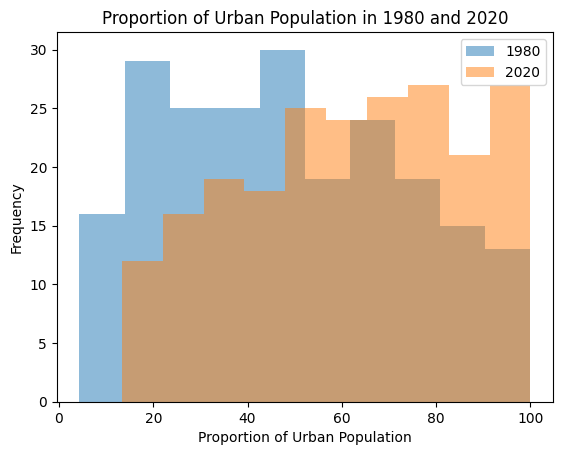

In [65]:
# Write your own code here

data_urban = pd.read_csv("data/wdi_urban.csv")

list_years = pd.unique(data_urban["year"])

for each_year in list_years:
    yeardata = data_urban.query("year == @each_year")
    plt.hist(yeardata["prop_urbanpopulation"],alpha=0.5)


plt.xlabel("Proportion of Urban Population")
plt.ylabel("Frequency")
plt.title("Proportion of Urban Population in 1980 and 2020")
plt.legend(labels = list_years)
